# Exploring Relationships: CA Districts

## Contents:
1. Imports
2. Exploring Relationships
3. Summary
4. Exports

### 1. Imports

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Defining path and importing df

path = r'C:\Users\walls\Documents\Coding\Data Analysis\CareerFoundry\Data Immersion A6\CA SAT Analysis'

# districts only dataframe
df_districts = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'SAT_Report_Districts.csv'), index_col = False) #previously df_record_d

In [3]:
df_districts.head()

,Unnamed: 0,index,cds_code,record_type,school,district,county,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage,year
0,2,2,1.100170e+12,D,NaN,Alameda County Office of Education,Alameda,263,95,395.0,378.0,388.0,6.0,6.32,FY16
1,4,4,1.611190e+12,D,NaN,Alameda Unified,Alameda,858,472,527.0,543.0,514.0,301.0,63.77,FY16
2,11,11,1.611270e+12,D,NaN,Albany City Unified,Alameda,300,179,585.0,607.0,575.0,148.0,82.68,FY16
3,13,13,1.611430e+12,D,NaN,Berkeley Unified,Alameda,922,542,561.0,559.0,553.0,357.0,65.87,FY16
4,16,16,1.611500e+12,D,NaN,Castro Valley Unified,Alameda,789,411,535.0,558.0,531.0,264.0,64.23,FY16


In [4]:
# Change cds_code to string

df_districts['cds_code'] = df_districts['cds_code'].astype(str)
df_districts['school'] = df_districts['school'].astype(str)

In [5]:
df_districts.head()

,Unnamed: 0,index,cds_code,record_type,school,district,county,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage,year
0,2,2,1100170000000.0,D,nan,Alameda County Office of Education,Alameda,263,95,395.0,378.0,388.0,6.0,6.32,FY16
1,4,4,1611190000000.0,D,nan,Alameda Unified,Alameda,858,472,527.0,543.0,514.0,301.0,63.77,FY16
2,11,11,1611270000000.0,D,nan,Albany City Unified,Alameda,300,179,585.0,607.0,575.0,148.0,82.68,FY16
3,13,13,1611430000000.0,D,nan,Berkeley Unified,Alameda,922,542,561.0,559.0,553.0,357.0,65.87,FY16
4,16,16,1611500000000.0,D,nan,Castro Valley Unified,Alameda,789,411,535.0,558.0,531.0,264.0,64.23,FY16


In [6]:
df_districts.shape

(421, 15)

In [7]:
df_districts.dtypes

Unnamed: 0        int64
index             int64
cds_code         object
record_type      object
school           object
district         object
county           object
enroll12          int64
test_takers       int64
avg_scr_read    float64
avg_scr_math    float64
avg_scr_writ    float64
scr>1500        float64
percentage      float64
year             object
dtype: object

### 2. Exploring Relationships

#### Categorical Plot

##### Deriving a new variable to use as categorical

In [8]:
# Create numerical subset of df_record_d to see only disctric data
numeric_record_d = df_districts.select_dtypes(include=[np.number])

# Removing index and percentage (irrelevant data)
numeric_record_d.drop(['index', 'percentage'], axis=1, inplace=True)

In [9]:
numeric_record_d.dtypes

Unnamed: 0        int64
enroll12          int64
test_takers       int64
avg_scr_read    float64
avg_scr_math    float64
avg_scr_writ    float64
scr>1500        float64
dtype: object

In [10]:
numeric_record_d.head()

,Unnamed: 0,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500
0,2,263,95,395.0,378.0,388.0,6.0
1,4,858,472,527.0,543.0,514.0,301.0
2,11,300,179,585.0,607.0,575.0,148.0
3,13,922,542,561.0,559.0,553.0,357.0
4,16,789,411,535.0,558.0,531.0,264.0


In [11]:
numeric_record_d.describe()

,Unnamed: 0,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,1162.399050,1045.073634,448.505938,488.700713,492.315914,477.923990,199.831354
std,709.914748,1356.721938,632.341437,50.011672,54.460492,50.270022,297.388511
min,2.000000,23.000000,15.000000,325.000000,333.000000,325.000000,0.000000
25%,474.000000,204.000000,65.000000,451.000000,454.000000,440.000000,20.000000
50%,1148.000000,561.000000,194.000000,488.000000,491.000000,474.000000,75.000000
75%,1821.000000,1419.000000,566.000000,523.000000,524.000000,510.000000,229.000000
max,2332.000000,10273.000000,5007.000000,642.000000,671.000000,645.000000,2093.000000


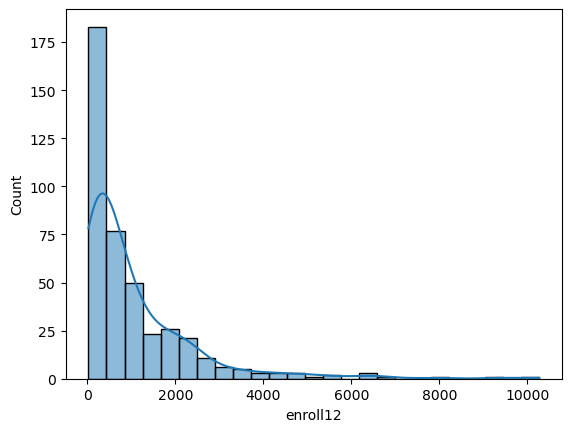

In [12]:
# Create plot

district_histogram = sns.histplot(numeric_record_d['enroll12'], bins = 25, kde = True) # Create a histogram based on school enrollment

##### District Categories

High enrollment >= 2000

Average enrollment >= 500 and <2000

Low enrollment < 500

In [13]:
# Create categories

numeric_record_d.loc[numeric_record_d['enroll12'] >= 2000, 'Enroll Category'] = 'High enrollment'
numeric_record_d.loc[(numeric_record_d['enroll12'] >= 500) & (numeric_record_d['enroll12'] < 2000), 'Enroll Category'] = 'Average enrollment'
numeric_record_d.loc[numeric_record_d['enroll12'] < 500, 'Enroll Category'] = 'Low enrollment'

In [14]:
numeric_record_d['Enroll Category'].value_counts(dropna = False)

Enroll Category
Low enrollment        198
Average enrollment    153
High enrollment        70
Name: count, dtype: int64

In [15]:
numeric_record_d.columns

Index(['Unnamed: 0', 'enroll12', 'test_takers', 'avg_scr_read', 'avg_scr_math',
       'avg_scr_writ', 'scr>1500', 'Enroll Category'],
      dtype='object')

In [16]:
numeric_record_d.shape

(421, 8)

<Figure size 3000x1000 with 0 Axes>

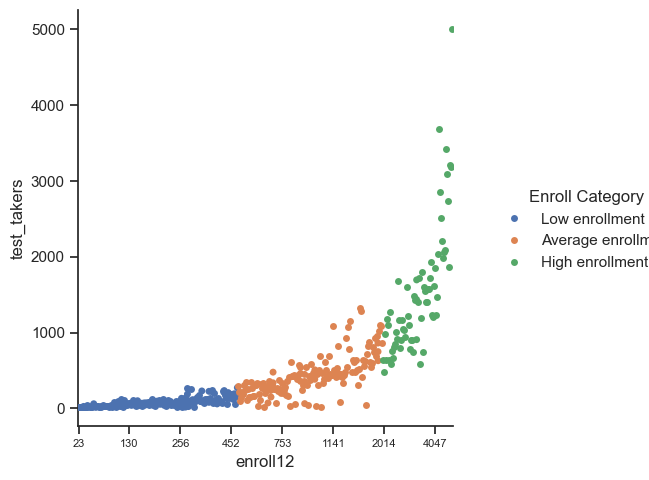

In [17]:
# Create a categorical plot in seaborn using the enrollment categories 

sns.set(style="ticks")
plt.figure(figsize=(30,10))
district_cat_plot = sns.catplot(x="enroll12", y="test_takers", hue="Enroll Category", data=numeric_record_d)
# Move the legend
district_cat_plot._legend.set_bbox_to_anchor((1,.5)) # Move legend to the right
ax = plt.gca()
n = 50 
ax.set_xticks(ax.get_xticks()[::n])
plt.xticks(fontsize=8)
plt.show()

##### Observations:
1. Low enrollment has a low number of test takers
2. Average and high enrollment overlap in number of test takers at times
3. High enrollment has highest amount of test takers
4. At the district level, having a lower enrollment does not always correlate to increased test taker totals

##### Hypotheses:
1. If schools have a lower enrollment, then a higher percentage of students take the SAT
2. If schools have higher enrollment, then SAT scores are lower
3. If the percentage of test takers is high, then SAT scores are higher

### 3. Summary:
1. df_districts 421, 14 >> 421, 15
2. Subsets created:
numeric_record_d only numeric values of df_districts 421, 6 >> 421, 7
3. new columns:
Enroll Category

### 4. Exports

In [18]:
#Export df

df_districts.to_csv(os.path.join(path, 'Data','Prepared Data', 'SAT_Report_Districts 2.csv'))

In [19]:
#Export plots

district_histogram.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'district_histogram.png'))
district_cat_plot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'district_catplot.png'))